In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
train_data=pd.read_csv("./data/used_car_train_20200313.csv",sep=' ')
test_data=pd.read_csv("./data/used_car_testB_20200421.csv",sep=' ')

In [3]:
train_data.head().append(train_data.tail())

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
149995,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,...,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592
149996,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,...,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160
149997,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,...,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931
149998,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,...,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014
149999,149999,177672,19990204,19.0,28,6.0,0.0,1.0,193,12.5,...,0.284475,0.000000,0.040072,0.062543,0.025819,1.978453,-3.179913,0.031724,-1.483350,-0.342674


In [4]:
train_data.shape

(150000, 31)

In [5]:
test_data.head().append(test_data.tail())

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,200000,133777,20000501,67.0,0,1.0,0.0,0.0,101,15.0,...,0.236520,0.000241,0.105319,0.046233,0.094522,3.619512,-0.280607,-2.019761,0.978828,0.803322
1,200001,61206,19950211,19.0,6,2.0,0.0,0.0,73,6.0,...,0.261518,0.000000,0.120323,0.046784,0.035385,2.997376,-1.406705,-1.020884,-1.349990,-0.200542
2,200002,67829,20090606,5.0,5,4.0,0.0,0.0,120,5.0,...,0.261691,0.090836,0.000000,0.079655,0.073586,-3.951084,-0.433467,0.918964,1.634604,1.027173
3,200003,8892,20020601,22.0,9,1.0,0.0,0.0,58,15.0,...,0.236050,0.101777,0.098950,0.026830,0.096614,-2.846788,2.800267,-2.524610,1.076819,0.461610
4,200004,76998,20030301,46.0,6,0.0,NaN,0.0,116,15.0,...,0.257000,0.000000,0.066732,0.057771,0.068852,2.839010,-1.659801,-0.924142,0.199423,0.451014
49995,249995,111443,20041005,4.0,4,0.0,NaN,1.0,150,15.0,...,0.263668,0.000292,0.141804,0.076393,0.039272,2.072901,-2.531869,1.716978,-1.063437,0.326587
49996,249996,152834,20130409,65.0,1,0.0,0.0,0.0,179,4.0,...,0.255310,0.000991,0.155868,0.108425,0.067841,1.358504,-3.290295,4.269809,0.140524,0.556221
49997,249997,132531,20041211,4.0,4,0.0,0.0,1.0,147,12.5,...,0.262933,0.000318,0.141872,0.071968,0.042966,2.165658,-2.417885,1.370612,-1.073133,0.270602
49998,249998,143405,20020702,40.0,1,4.0,0.0,1.0,176,15.0,...,0.282106,0.000023,0.067483,0.067526,0.009006,2.030114,-2.939244,0.569078,-1.718245,0.316379
49999,249999,78202,20090708,32.0,8,1.0,0.0,0.0,0,3.0,...,0.231449,0.103947,0.096027,0.062328,0.110180,-3.689090,2.032376,0.109157,2.202828,0.847469


In [6]:
test_data.shape

(50000, 30)

In [7]:
train_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,...,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,...,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,...,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,...,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


In [8]:
test_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,50000.000000,50000.000000,5.000000e+04,50000.00000,50000.000000,48496.000000,47076.000000,48032.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,224999.500000,68505.606100,2.003401e+07,47.64948,8.087140,1.793736,0.376498,0.226953,119.766960,12.598260,...,0.248147,0.044624,0.124693,0.058198,0.062113,0.019633,0.002759,0.004342,0.004570,-0.007209
std,14433.901067,61032.124271,5.351615e+04,49.90741,7.899648,1.764970,0.549281,0.418866,206.313348,3.912519,...,0.045836,0.051664,0.201440,0.029171,0.035723,3.764095,3.289523,2.515912,1.287194,1.044718
min,200000.000000,1.000000,1.991000e+07,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.119719,-5.662163,-8.291868,-4.157649,-6.098192
25%,212499.750000,11315.000000,1.999100e+07,11.00000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243436,0.000035,0.062519,0.035413,0.033880,-3.675196,-1.963928,-1.865406,-1.048722,-0.440706
50%,224999.500000,52215.000000,2.003091e+07,30.00000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,...,0.257818,0.000801,0.095880,0.056804,0.058749,1.632134,-0.375537,-0.138943,-0.036352,0.136849
75%,237499.250000,118710.750000,2.007110e+07,66.00000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265263,0.101654,0.125470,0.079387,0.087624,2.846205,1.263451,1.775632,0.945239,0.685555
max,249999.000000,196808.000000,2.015121e+07,246.00000,39.000000,7.000000,6.000000,1.000000,19211.000000,15.000000,...,0.291176,0.153403,1.411559,0.157458,0.211304,12.177864,18.789496,13.384828,5.635374,2.649768


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
SaleID               150000 non-null int64
name                 150000 non-null int64
regDate              150000 non-null int64
model                149999 non-null float64
brand                150000 non-null int64
bodyType             145494 non-null float64
fuelType             141320 non-null float64
gearbox              144019 non-null float64
power                150000 non-null int64
kilometer            150000 non-null float64
notRepairedDamage    150000 non-null object
regionCode           150000 non-null int64
seller               150000 non-null int64
offerType            150000 non-null int64
creatDate            150000 non-null int64
price                150000 non-null int64
v_0                  150000 non-null float64
v_1                  150000 non-null float64
v_2                  150000 non-null float64
v_3                  150000 non-null float64
v_4       

In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
SaleID               50000 non-null int64
name                 50000 non-null int64
regDate              50000 non-null int64
model                50000 non-null float64
brand                50000 non-null int64
bodyType             48496 non-null float64
fuelType             47076 non-null float64
gearbox              48032 non-null float64
power                50000 non-null int64
kilometer            50000 non-null float64
notRepairedDamage    50000 non-null object
regionCode           50000 non-null int64
seller               50000 non-null int64
offerType            50000 non-null int64
creatDate            50000 non-null int64
v_0                  50000 non-null float64
v_1                  50000 non-null float64
v_2                  50000 non-null float64
v_3                  50000 non-null float64
v_4                  50000 non-null float64
v_5                  50000 non

In [11]:
train_data.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   1
brand                   0
bodyType             4506
fuelType             8680
gearbox              5981
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
creatDate               0
price                   0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

In [12]:
test_data.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   0
brand                   0
bodyType             1504
fuelType             2924
gearbox              1968
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
creatDate               0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

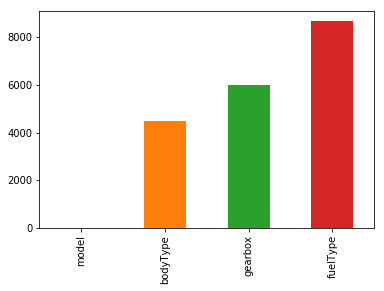

In [13]:
missing=train_data.isnull().sum()
missing=missing[missing>0]
missing.sort_values(inplace=True)
missing.plot.bar()

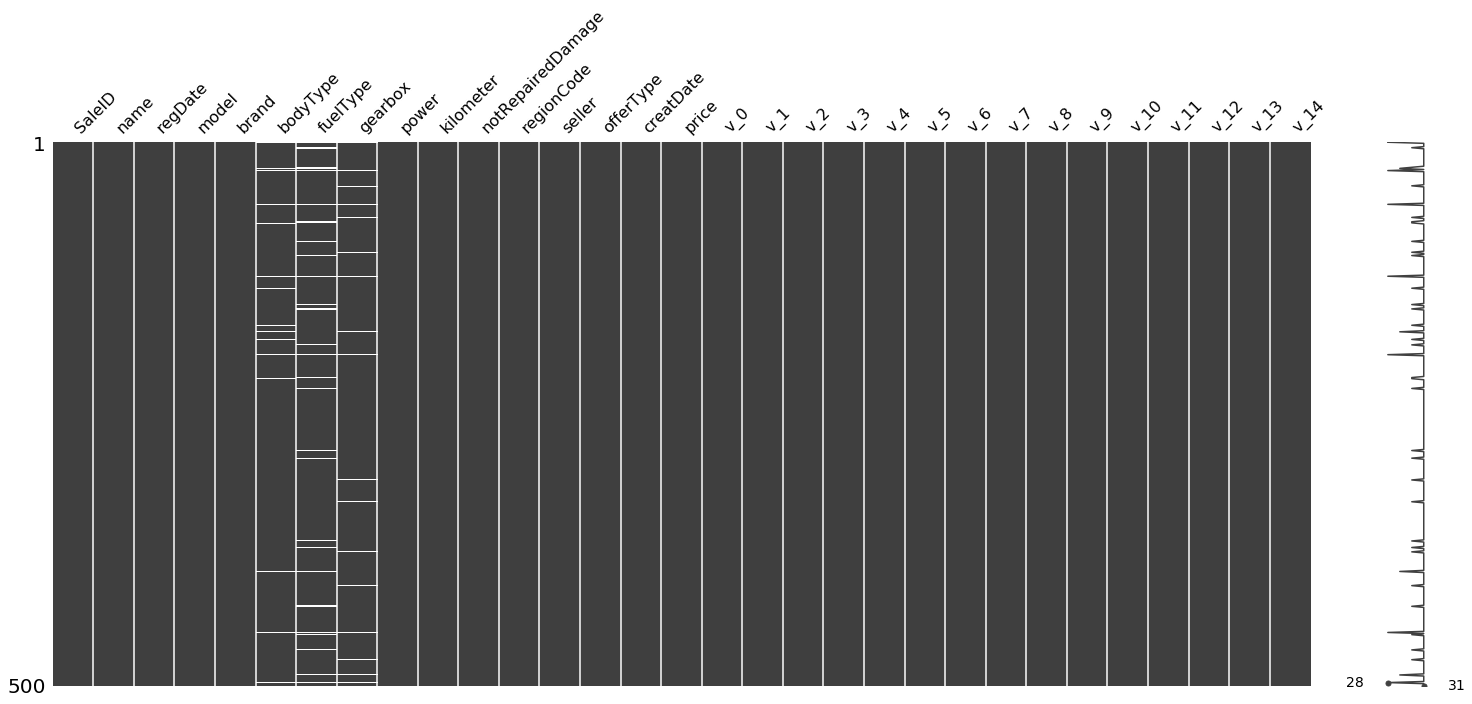

In [14]:
msno.matrix(train_data.sample(500))

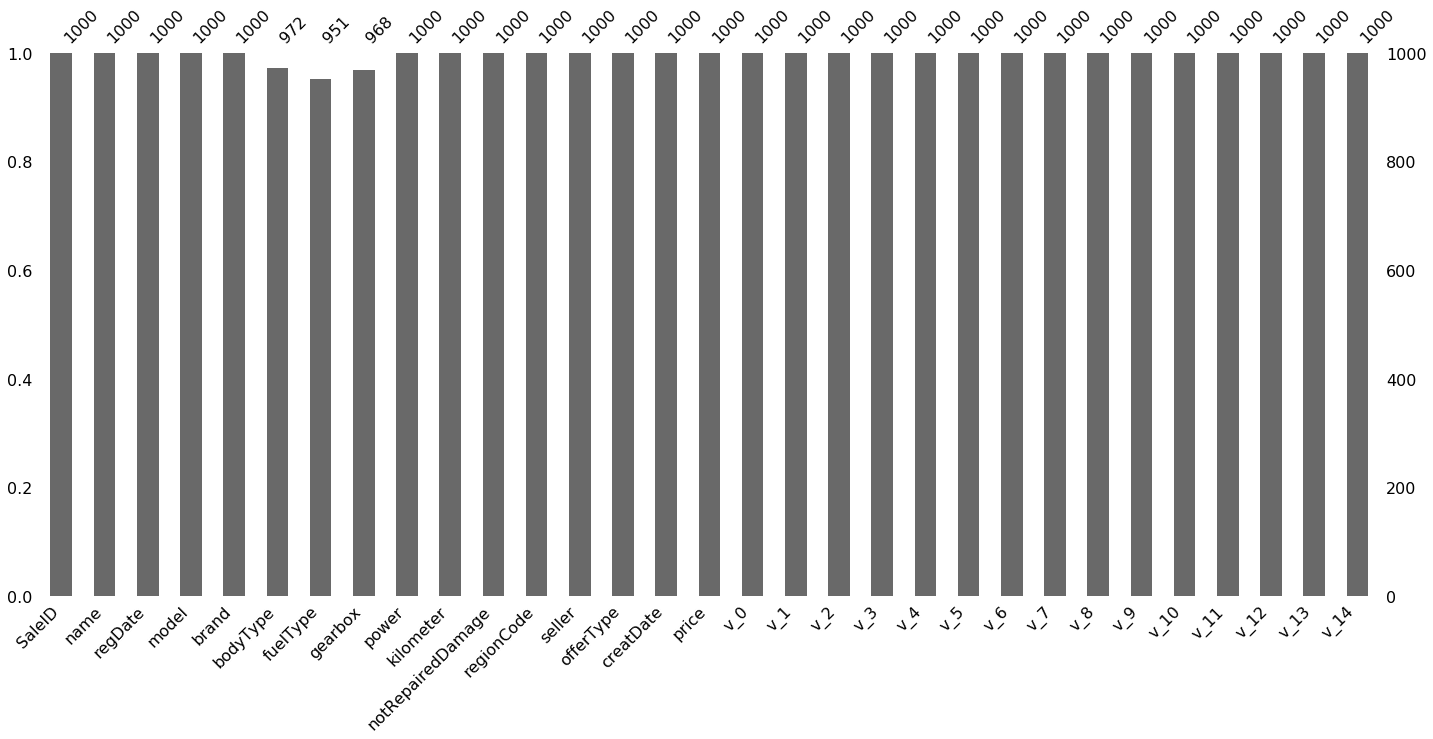

In [5]:
msno.bar(train_data.sample(1000))

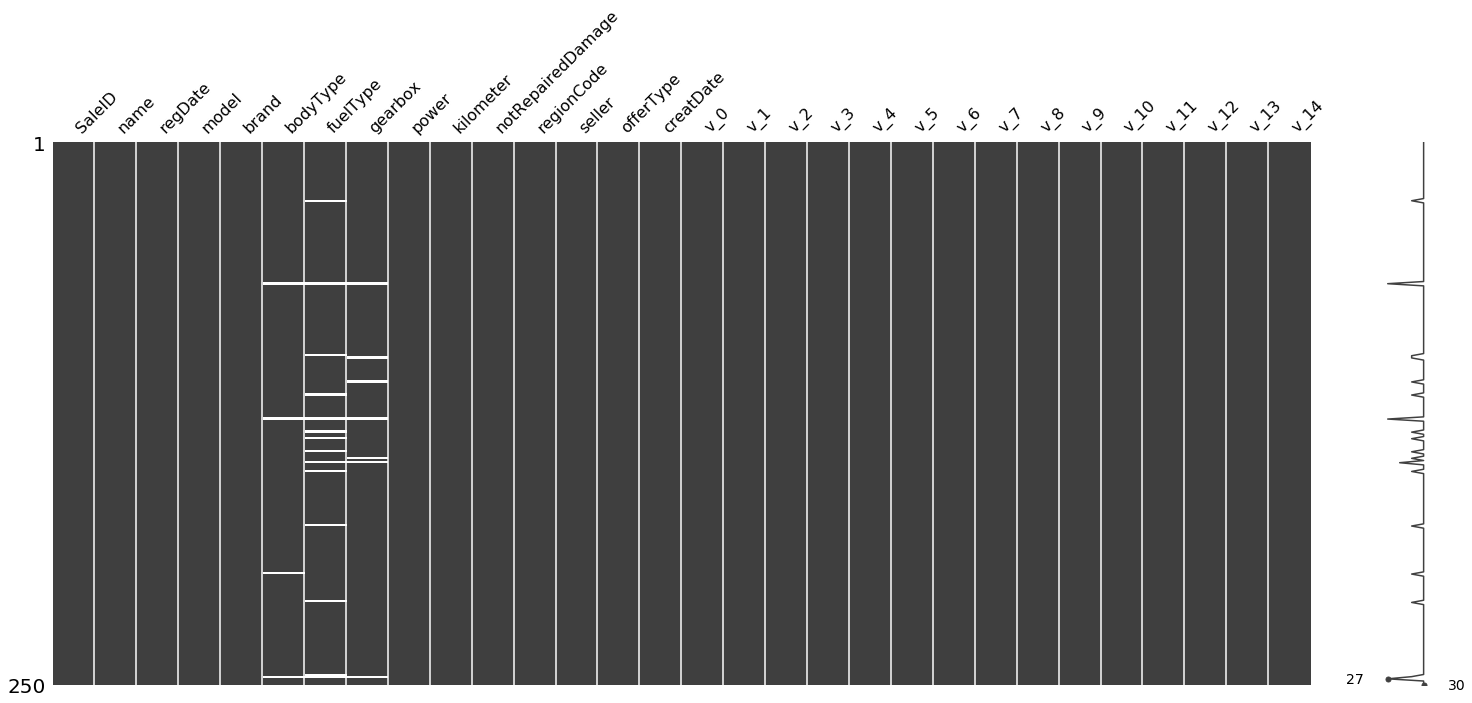

In [6]:
msno.matrix(test_data.sample(250))

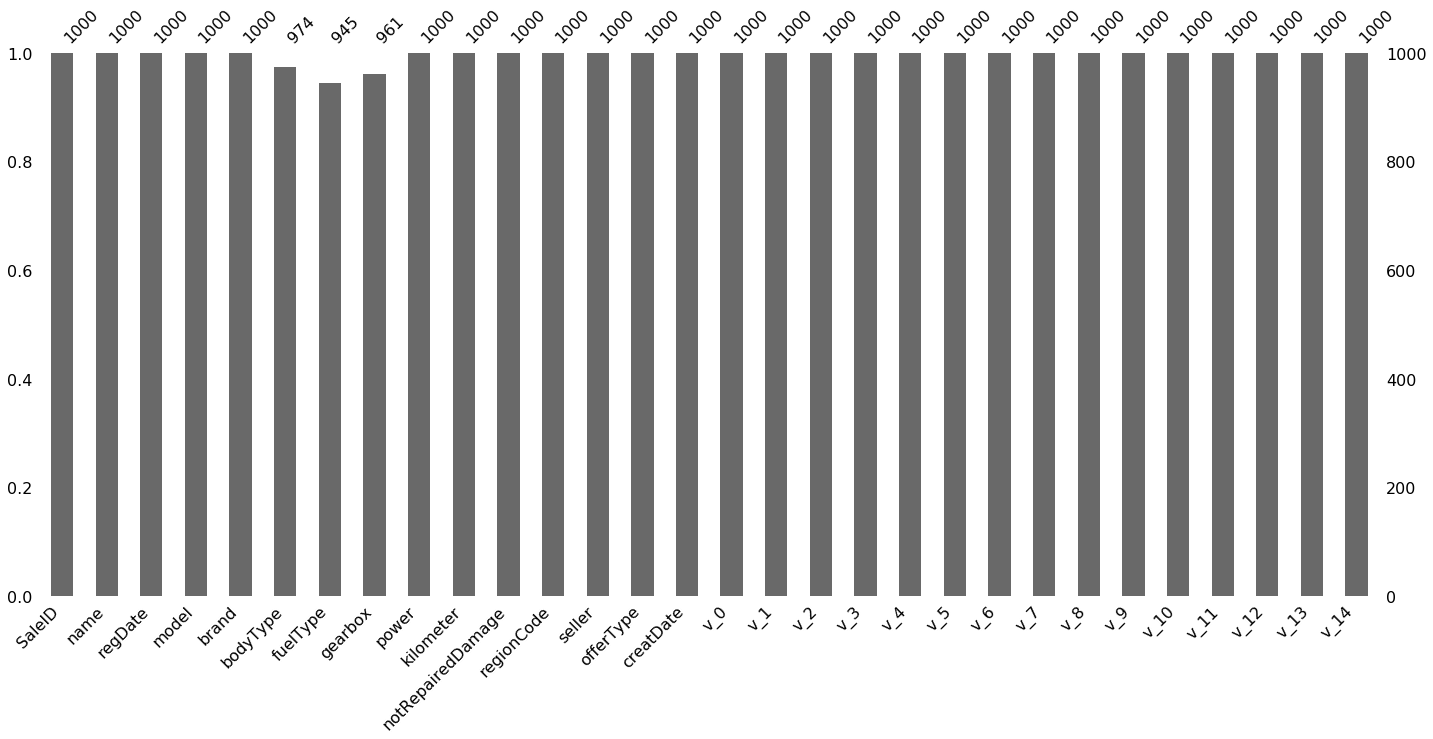

In [7]:
msno.bar(test_data.sample(1000))

In [8]:
#查看异常值，
#可以发现除了notRepairedDamage 为object类型其他都为数字 这里我们把他的几个不同的值都进行显示就知道了
train_data['notRepairedDamage'].value_counts()

0.0    111361
-       24324
1.0     14315
Name: notRepairedDamage, dtype: int64

In [9]:
train_data['notRepairedDamage'].replace('-',np.nan,inplace=True)
train_data['notRepairedDamage'].value_counts()

0.0    111361
1.0     14315
Name: notRepairedDamage, dtype: int64

In [10]:
test_data.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   0
brand                   0
bodyType             1504
fuelType             2924
gearbox              1968
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
creatDate               0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

In [11]:
train_data['seller'].value_counts()

0    149999
1         1
Name: seller, dtype: int64

In [12]:
train_data['offerType'].value_counts()

0    150000
Name: offerType, dtype: int64

In [13]:
del train_data["seller"]
del train_data["offerType"]
del test_data["seller"]
del test_data["offerType"]

In [14]:
train_data['price']

0          1850
1          3600
2          6222
3          2400
4          5200
5          8000
6          3500
7          1000
8          2850
9           650
10         3100
11         5450
12         1600
13         3100
14         6900
15         3200
16        10500
17         3700
18          790
19         1450
20          990
21         2800
22          350
23          599
24         9250
25         3650
26         2800
27         2399
28         4900
29         2999
          ...  
149970      900
149971     3400
149972      999
149973     3500
149974     4500
149975     3990
149976     1200
149977      330
149978     3350
149979     5000
149980     4350
149981     9000
149982     2000
149983    12000
149984     6700
149985     4200
149986     2800
149987     3000
149988     7500
149989     1150
149990      450
149991    24950
149992      950
149993     4399
149994    14780
149995     5900
149996     9500
149997     7500
149998     4999
149999     4700
Name: price, Length: 150

In [15]:
train_data['price'].value_counts()

500      2337
1500     2158
1200     1922
1000     1850
2500     1821
600      1535
3500     1533
800      1513
2000     1378
999      1356
750      1279
4500     1271
650      1257
1800     1223
2200     1201
850      1198
700      1174
900      1107
1300     1105
950      1104
3000     1098
1100     1079
5500     1079
1600     1074
300      1071
550      1042
350      1005
1250     1003
6500      973
1999      929
         ... 
21560       1
7859        1
3120        1
2279        1
6066        1
6322        1
4275        1
10420       1
43300       1
305         1
1765        1
15970       1
44400       1
8885        1
2992        1
31850       1
15413       1
13495       1
9525        1
7270        1
13879       1
3760        1
24250       1
11360       1
10295       1
25321       1
8886        1
8801        1
37920       1
8188        1
Name: price, Length: 3763, dtype: int64

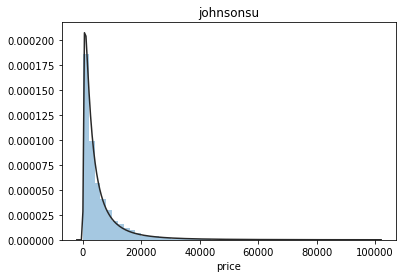

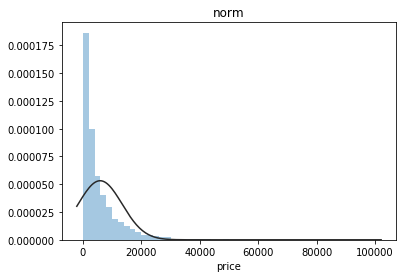

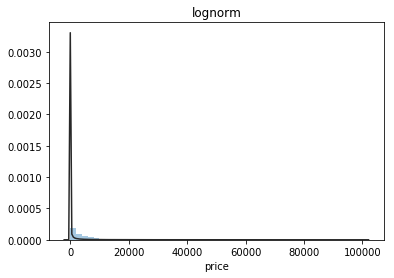

In [16]:
import scipy.stats as st
y=train_data['price']
plt.figure(1); plt.title('johnsonsu')
sns.distplot(y,kde=False,fit=st.johnsonsu)
plt.figure(2); plt.title('norm')
sns.distplot(y,kde=False,fit=st.norm)
plt.figure(3); plt.title('lognorm')
sns.distplot(y,kde=False,fit=st.lognorm)

Skewness: 3.346487
Kurtosis: 18.995183


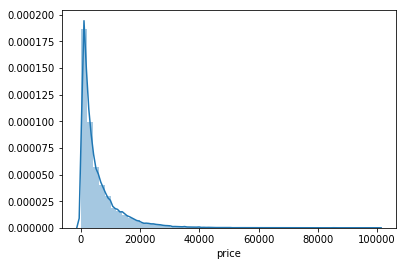

In [17]:
## 2) 查看skewness and kurtosis
sns.distplot(train_data['price']);
print("Skewness: %f" % train_data['price'].skew())
print("Kurtosis: %f" % train_data['price'].kurt())

In [18]:
train_data.skew(), train_data.kurt()

(SaleID               6.017846e-17
 name                 5.576058e-01
 regDate              2.849508e-02
 model                1.484388e+00
 brand                1.150760e+00
 bodyType             9.915299e-01
 fuelType             1.595486e+00
 gearbox              1.317514e+00
 power                6.586318e+01
 kilometer           -1.525921e+00
 notRepairedDamage    2.430640e+00
 regionCode           6.888812e-01
 creatDate           -7.901331e+01
 price                3.346487e+00
 v_0                 -1.316712e+00
 v_1                  3.594543e-01
 v_2                  4.842556e+00
 v_3                  1.062920e-01
 v_4                  3.679890e-01
 v_5                 -4.737094e+00
 v_6                  3.680730e-01
 v_7                  5.130233e+00
 v_8                  2.046133e-01
 v_9                  4.195007e-01
 v_10                 2.522046e-02
 v_11                 3.029146e+00
 v_12                 3.653576e-01
 v_13                 2.679152e-01
 v_14               

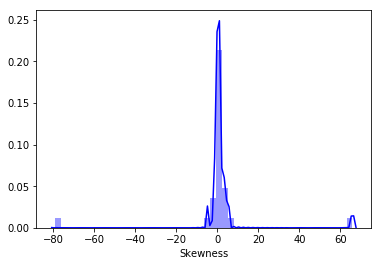

In [19]:
sns.distplot(train_data.skew(),color='blue',axlabel ='Skewness')

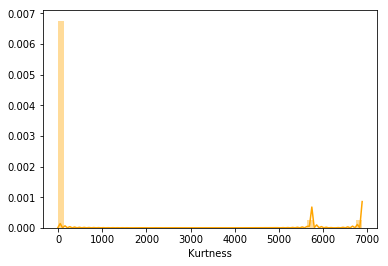

In [20]:
sns.distplot(train_data.kurt(),color='orange',axlabel ='Kurtness')

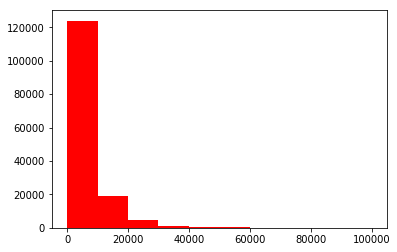

In [21]:
plt.hist(train_data['price'],orientation='vertical',histtype='bar',color='red')
plt.show()

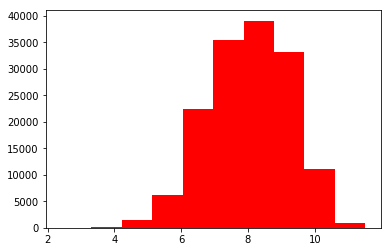

In [22]:
plt.hist(np.log(train_data['price']), orientation = 'vertical',histtype = 'bar', color ='red')
plt.show()

In [23]:
Y_train = train_data['price']
numeric_features = ['power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14']     
categorical_features = ['name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage','regionCode','creatDate']

In [24]:
for cat_feature in categorical_features:
    print(cat_feature+'特征分布如下')
    print("{}特征有{}个不同的值".format(cat_feature,train_data[cat_feature].nunique()))
    print(train_data[cat_feature].value_counts())

name特征分布如下
name特征有99662个不同的值
708       282
387       282
55        280
1541      263
203       233
53        221
713       217
290       197
1186      184
911       182
2044      176
1513      160
1180      158
631       157
893       153
2765      147
473       141
1139      137
1108      132
444       129
306       127
2866      123
2402      116
533       114
1479      113
422       113
4635      110
725       110
964       109
1373      104
         ... 
89083       1
95230       1
164864      1
173060      1
179207      1
181256      1
185354      1
25564       1
19417       1
189324      1
162719      1
191373      1
193422      1
136082      1
140180      1
144278      1
146327      1
148376      1
158621      1
1404        1
15319       1
46022       1
64463       1
976         1
3025        1
5074        1
7123        1
11221       1
13270       1
174485      1
Name: name, Length: 99662, dtype: int64
model特征分布如下
model特征有248个不同的值
0.0      11762
19.0      9573
4.0       8445
1.0

In [25]:
# 特征nunique分布
for cat_fea in categorical_features:
    print(cat_fea + "的特征分布如下：")
    print("{}特征有个{}不同的值".format(cat_fea, test_data[cat_fea].nunique()))
    print(test_data[cat_fea].value_counts())

name的特征分布如下：
name特征有个37536不同的值
387       94
55        93
1541      86
708       85
203       78
713       75
911       72
1180      71
53        68
290       68
631       67
1186      60
473       54
306       53
2866      52
2044      50
422       49
893       47
1513      46
2765      45
533       44
964       44
1139      41
1479      41
2825      38
444       37
4635      37
984       37
282       35
691       33
          ..
9747       1
7857       1
75120      1
144754     1
15731      1
66932      1
76360      1
66082      1
89231      1
93561      1
161146     1
21886      1
42368      1
101765     1
89653      1
38278      1
89645      1
60809      1
62858      1
195979     1
185951     1
81299      1
168479     1
28057      1
30106      1
97691      1
155039     1
44449      1
112034     1
105129     1
Name: name, Length: 37536, dtype: int64
model的特征分布如下：
model特征有个245不同的值
0.0      3772
19.0     3226
4.0      2790
1.0      1981
29.0     1778
48.0     1711
40.0     1524
26.0   

In [26]:
numeric_features.append('price')
numeric_features

['power',
 'kilometer',
 'v_0',
 'v_1',
 'v_2',
 'v_3',
 'v_4',
 'v_5',
 'v_6',
 'v_7',
 'v_8',
 'v_9',
 'v_10',
 'v_11',
 'v_12',
 'v_13',
 'v_14',
 'price']

In [27]:
price_numeric=train_data[numeric_features]
correlation=price_numeric.corr()
print(correlation['price'].sort_values(ascending=False),'\n')

price        1.000000
v_12         0.692823
v_8          0.685798
v_0          0.628397
power        0.219834
v_5          0.164317
v_2          0.085322
v_6          0.068970
v_1          0.060914
v_14         0.035911
v_13        -0.013993
v_7         -0.053024
v_4         -0.147085
v_9         -0.206205
v_10        -0.246175
v_11        -0.275320
kilometer   -0.440519
v_3         -0.730946
Name: price, dtype: float64 



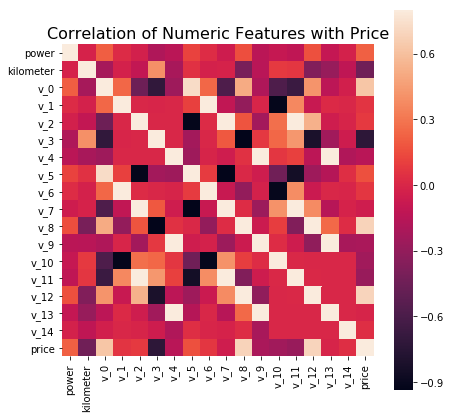

In [28]:
f,ax=plt.subplots(figsize=(7,7))
plt.title('Correlation of Numeric Features with Price',y=1,size=16)
sns.heatmap(correlation,square=True,vmax=0.8)

In [29]:
del price_numeric['price']

In [30]:
## 2) 查看几个特征得 偏度和峰值
for col in numeric_features:
    print('{:15}'.format(col),
    'Skewness: {:05.2f}'.format(train_data[col].skew()) ,
    ' ' ,
    'Kurtosis: {:06.2f}'.format(train_data[col].kurt())
    )

power           Skewness: 65.86   Kurtosis: 5733.45
kilometer       Skewness: -1.53   Kurtosis: 001.14
v_0             Skewness: -1.32   Kurtosis: 003.99
v_1             Skewness: 00.36   Kurtosis: -01.75
v_2             Skewness: 04.84   Kurtosis: 023.86
v_3             Skewness: 00.11   Kurtosis: -00.42
v_4             Skewness: 00.37   Kurtosis: -00.20
v_5             Skewness: -4.74   Kurtosis: 022.93
v_6             Skewness: 00.37   Kurtosis: -01.74
v_7             Skewness: 05.13   Kurtosis: 025.85
v_8             Skewness: 00.20   Kurtosis: -00.64
v_9             Skewness: 00.42   Kurtosis: -00.32
v_10            Skewness: 00.03   Kurtosis: -00.58
v_11            Skewness: 03.03   Kurtosis: 012.57
v_12            Skewness: 00.37   Kurtosis: 000.27
v_13            Skewness: 00.27   Kurtosis: -00.44
v_14            Skewness: -1.19   Kurtosis: 002.39
price           Skewness: 03.35   Kurtosis: 019.00


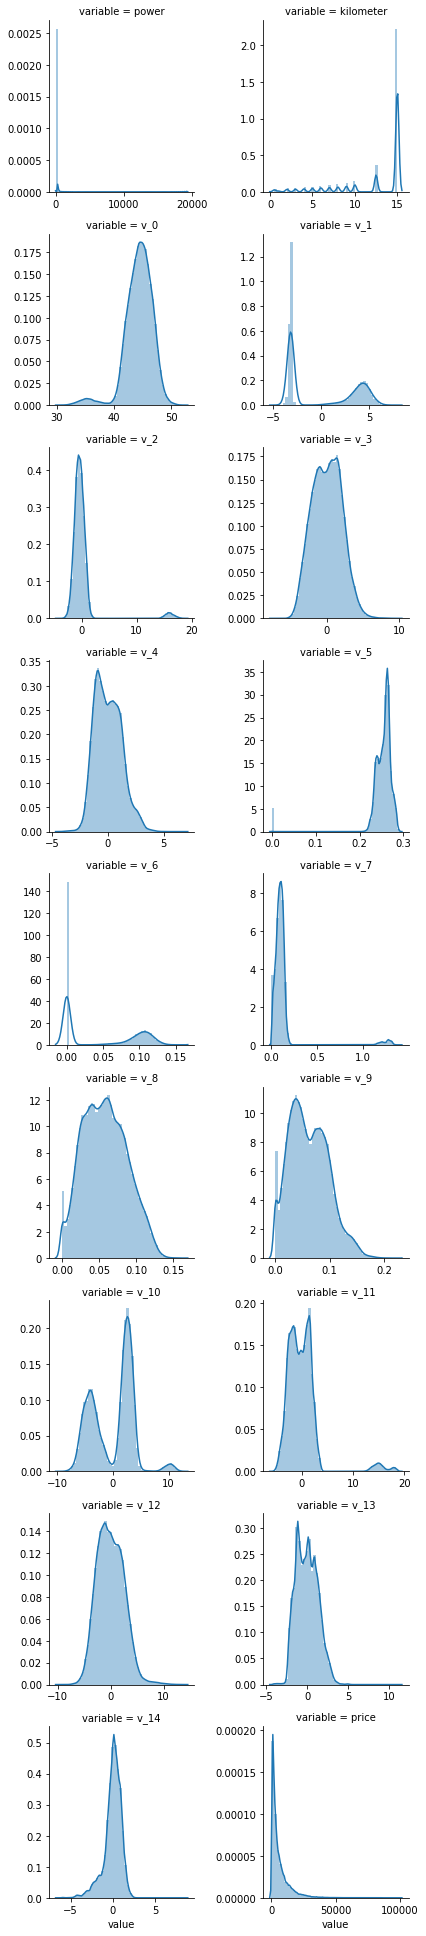

In [31]:
f = pd.melt(train_data, value_vars=numeric_features)
g=sns.FacetGrid(f,col="variable",col_wrap=2,sharex=False,sharey=False)
g=g.map(sns.distplot,"value")

D:\Program Files\Anaconda\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


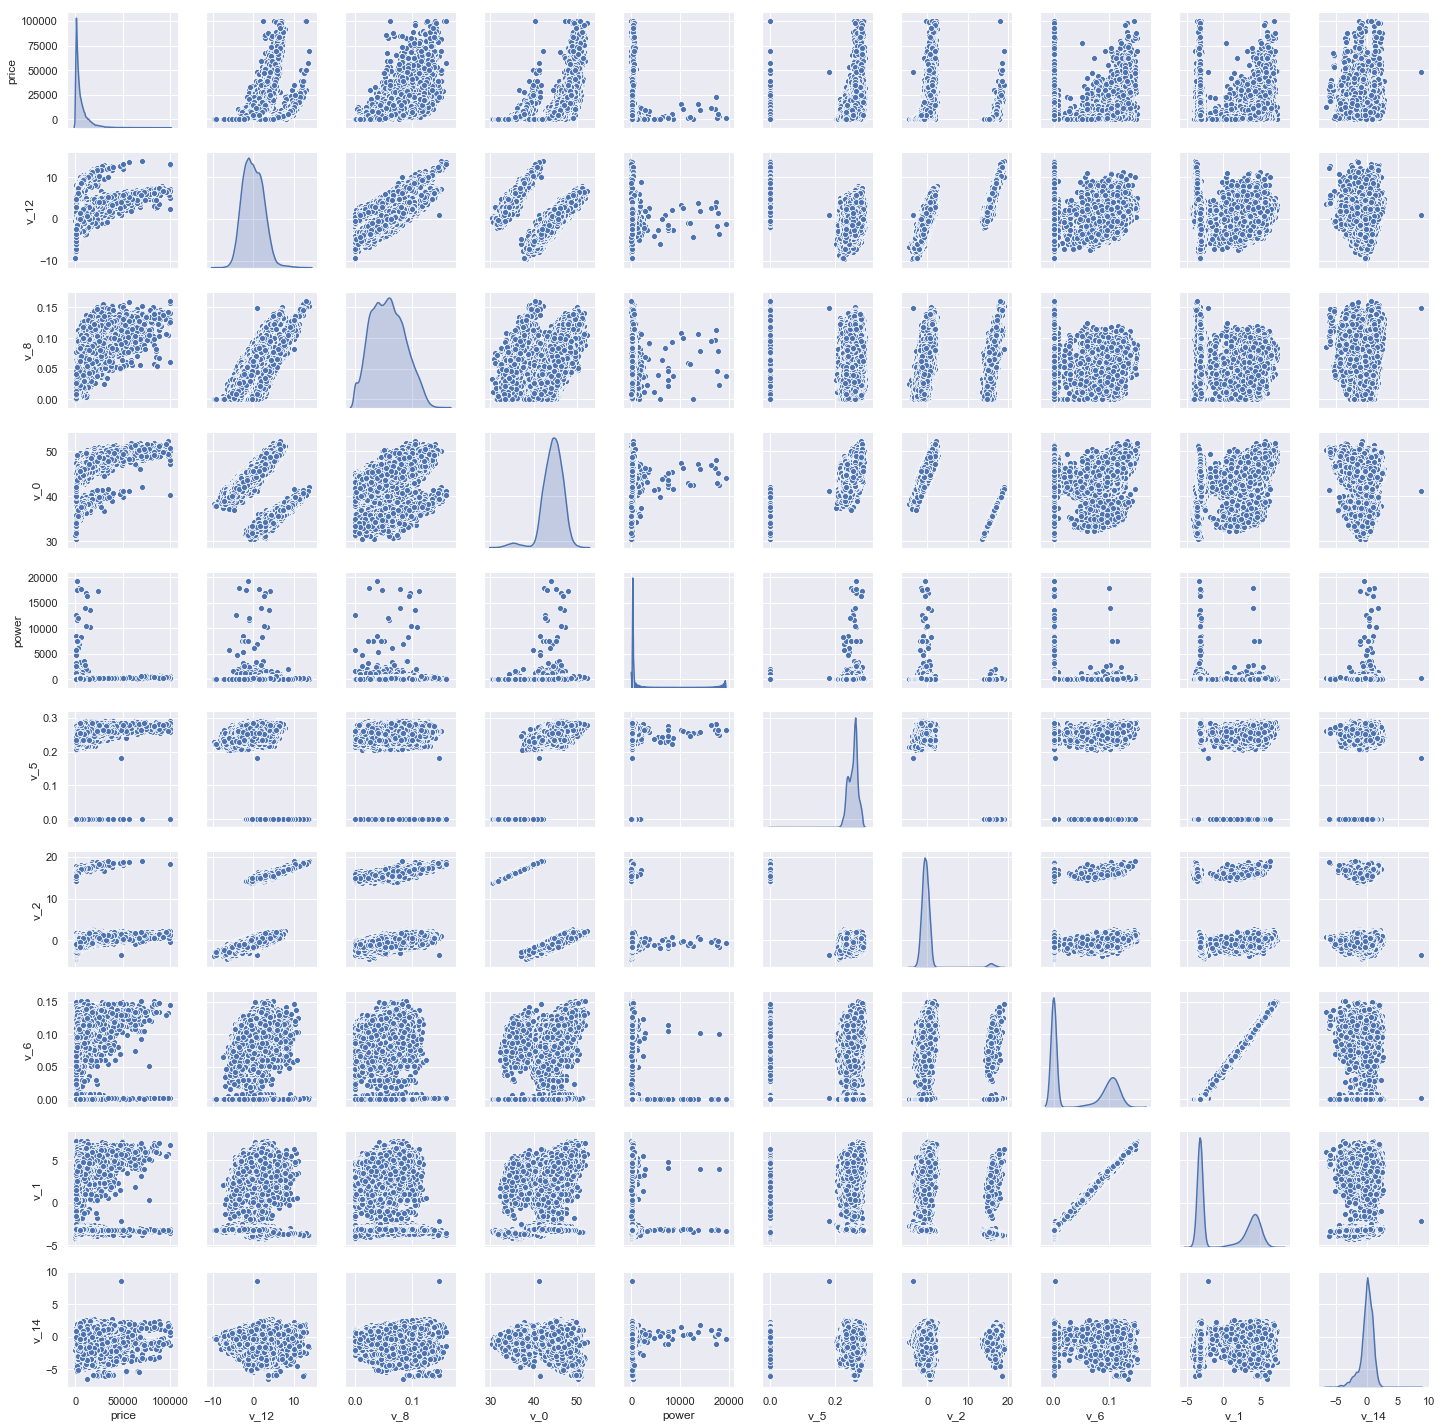

In [32]:
## 4) 数字特征相互之间的关系可视化
sns.set()
columns=['price', 'v_12', 'v_8' , 'v_0', 'power', 'v_5', 'v_2', 'v_6', 'v_1', 'v_14']
sns.pairplot(train_data[columns],size=2,kind='scatter',diag_kind='kde')
plt.show()

In [33]:
train_data.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6',
       'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14'],
      dtype='object')

In [34]:
Y_train

0          1850
1          3600
2          6222
3          2400
4          5200
5          8000
6          3500
7          1000
8          2850
9           650
10         3100
11         5450
12         1600
13         3100
14         6900
15         3200
16        10500
17         3700
18          790
19         1450
20          990
21         2800
22          350
23          599
24         9250
25         3650
26         2800
27         2399
28         4900
29         2999
          ...  
149970      900
149971     3400
149972      999
149973     3500
149974     4500
149975     3990
149976     1200
149977      330
149978     3350
149979     5000
149980     4350
149981     9000
149982     2000
149983    12000
149984     6700
149985     4200
149986     2800
149987     3000
149988     7500
149989     1150
149990      450
149991    24950
149992      950
149993     4399
149994    14780
149995     5900
149996     9500
149997     7500
149998     4999
149999     4700
Name: price, Length: 150

In [35]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(nrows=5, ncols=2,
# ['v_12', 'v_8' , 'v_0', 'power', 'v_5', 'v_2', 'v_6', 'v_1', 'v_14']
v_12_scatter_plot = pd.concat([Y_train,train_data['v_12']],axis = 1)
sns.regplot(x='v_12',y = 'price', data = v_12_scatter_plot,scatter= True, fit_reg=True, ax=ax1)
v_8_scatter_plot = pd.concat([Y_train,train_data['v_8']],axis = 1)
sns.regplot(x='v_8',y = 'price',data = v_8_scatter_plot,scatter= True, fit_reg=True, ax=ax2)
v_0_scatter_plot = pd.concat([Y_train,train_data['v_0']],axis = 1)
sns.regplot(x='v_0',y = 'price',data = v_0_scatter_plot,scatter= True, fit_reg=True, ax=ax3)
power_scatter_plot = pd.concat([Y_train,train_data['power']],axis = 1)
sns.regplot(x='power',y = 'price',data = power_scatter_plot,scatter= True, fit_reg=True, ax=ax4)
v_5_scatter_plot = pd.concat([Y_train,train_data['v_5']],axis = 1)
sns.regplot(x='v_5',y = 'price',data = v_5_scatter_plot,scatter= True, fit_reg=True, ax=ax5)
v_2_scatter_plot = pd.concat([Y_train,train_data['v_2']],axis = 1)
sns.regplot(x='v_2',y = 'price',data = v_2_scatter_plot,scatter= True, fit_reg=True, ax=ax6)
v_6_scatter_plot = pd.concat([Y_train,train_data['v_6']],axis = 1)
sns.regplot(x='v_6',y = 'price',data = v_6_scatter_plot,scatter= True, fit_reg=True, ax=ax7)
v_1_scatter_plot = pd.concat([Y_train,train_data['v_1']],axis = 1)
sns.regplot(x='v_1',y = 'price',data = v_1_scatter_plot,scatter= True, fit_reg=True, ax=ax8)
v_14_scatter_plot = pd.concat([Y_train,train_data['v_14']],axis = 1)
sns.regplot(x='v_14',y = 'price',data = v_14_scatter_plot,scatter= True, fit_reg=True, ax=ax9)
v_13_scatter_plot = pd.concat([Y_train,train_data['v_13']],axis = 1)
sns.regplot(x='v_13',y = 'price',data = v_13_scatter_plot,scatter= True, fit_reg=True, ax=ax10)

SyntaxError: invalid syntax (<ipython-input-35-f13042f2db7c>, line 4)

In [36]:
## 1) unique分布
for fea in categorical_features:
    print(train_data[fea].nunique())

99662
248
40
8
7
2
2
7905
96


In [37]:
categorical_features

['name',
 'model',
 'brand',
 'bodyType',
 'fuelType',
 'gearbox',
 'notRepairedDamage',
 'regionCode',
 'creatDate']

D:\Program Files\Anaconda\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


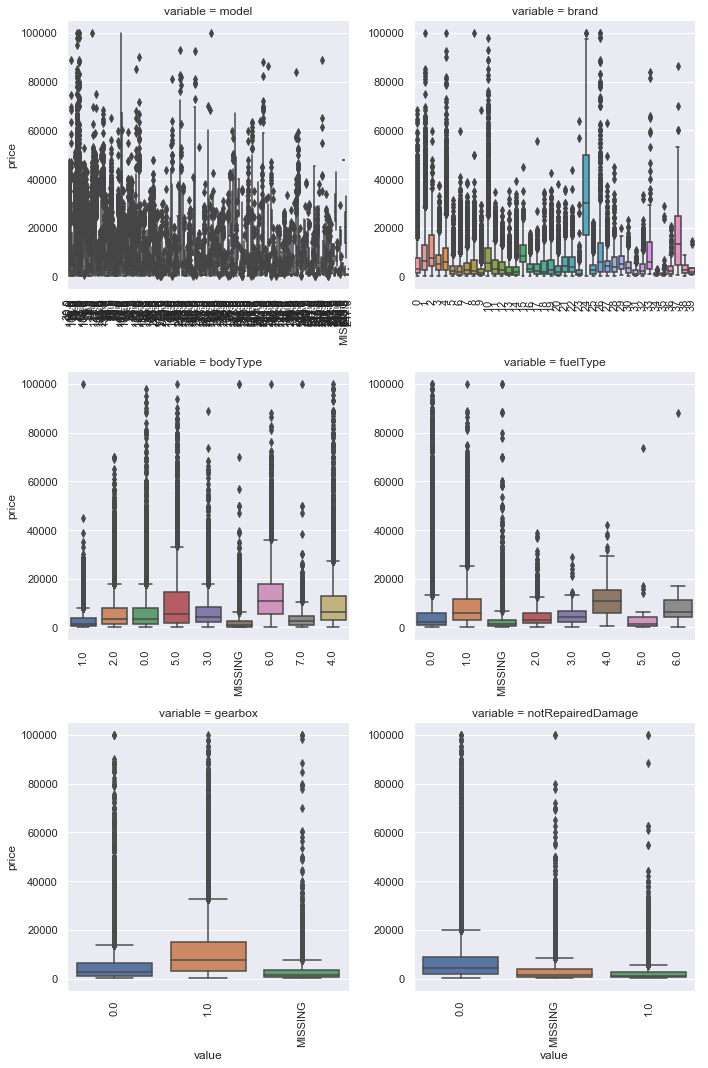

In [38]:
## 2) 类别特征箱形图可视化
# 因为 name和 regionCode的类别太稀疏了，这里我们把不稀疏的几类画一下
categorical_features = ['model',
'brand',
'bodyType',
'fuelType',
'gearbox',
'notRepairedDamage']
for c in categorical_features:
    train_data[c]=train_data[c].astype('category')
    if train_data[c].isnull().any():
        train_data[c]=train_data[c].cat.add_categories(['MISSING'])
        train_data[c]=train_data[c].fillna('MISSING')
def boxplot(x,y,**kwargs):
    sns.boxplot(x=x,y=y)
    x=plt.xticks(rotation=90)
    
f=pd.melt(train_data,id_vars=['price'],value_vars=categorical_features)
g=sns.FacetGrid(f,col="variable",col_wrap=2,sharex=False,sharey=False,size=5)
g=g.map(boxplot,"value","price")


In [45]:
train_data.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6',
       'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14'],
      dtype='object')

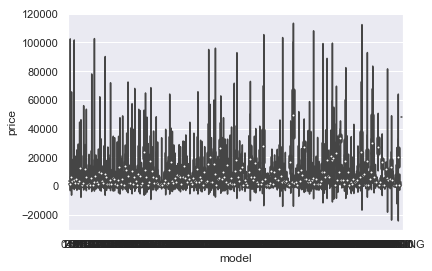

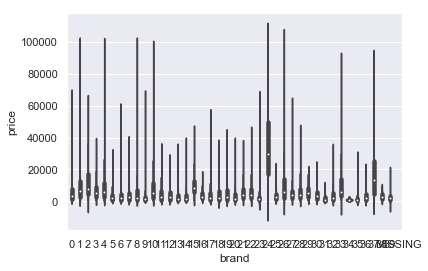

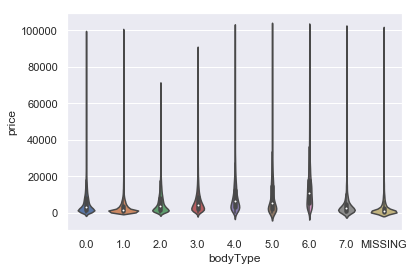

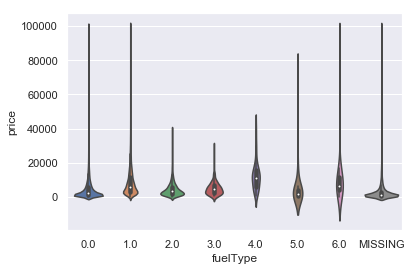

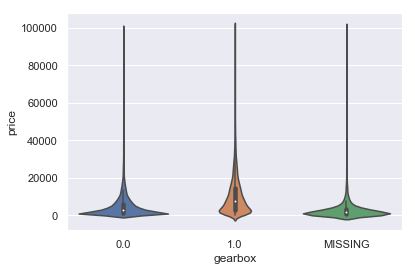

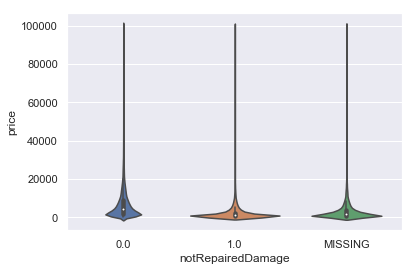

In [47]:
## 3) 类别特征的小提琴图可视化
catg_list = categorical_features
target = 'price'
for catg in catg_list :
    sns.violinplot(x=catg, y=target, data=train_data)
    plt.show()

In [48]:
categorical_features = ['model',
'brand',
'bodyType',
'fuelType',
'gearbox',
'notRepairedDamage']

D:\Program Files\Anaconda\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


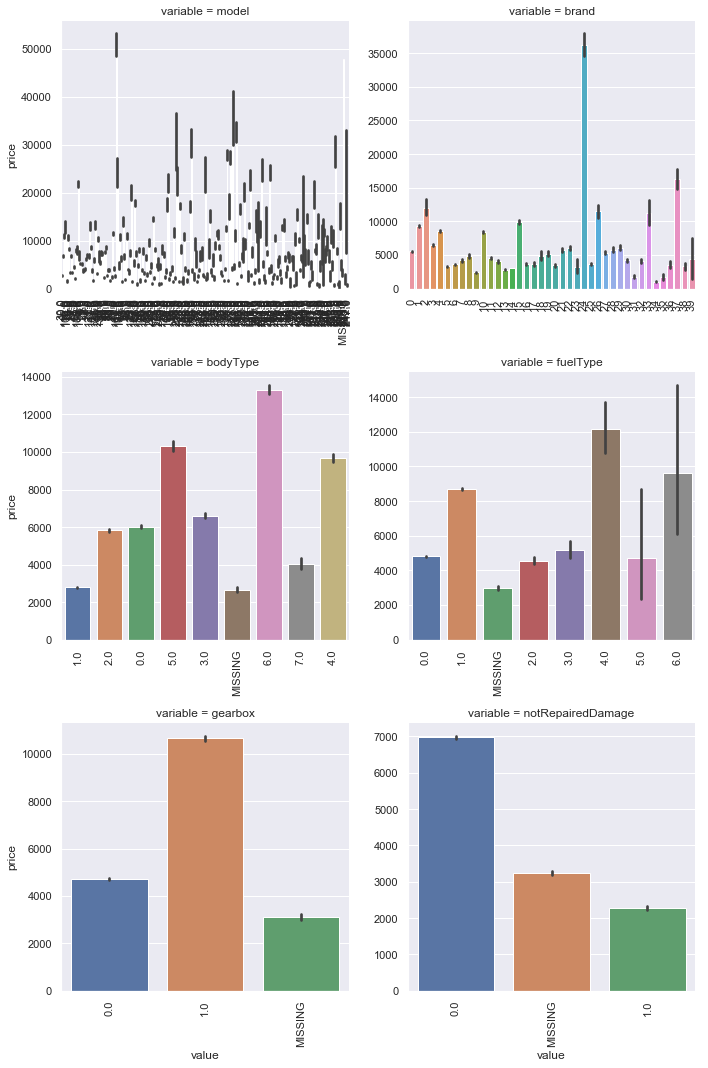

In [49]:
def bar_plot(x,y,**kwargs):
    sns.barplot(x=x,y=y)
    x=plt.xticks(rotation=90)

f=pd.melt(train_data,id_vars=['price'],value_vars=categorical_features)
g=sns.FacetGrid(f,col="variable",col_wrap=2,sharex=False,sharey=False,size=5)
g.map(bar_plot,"value","price")

D:\Program Files\Anaconda\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


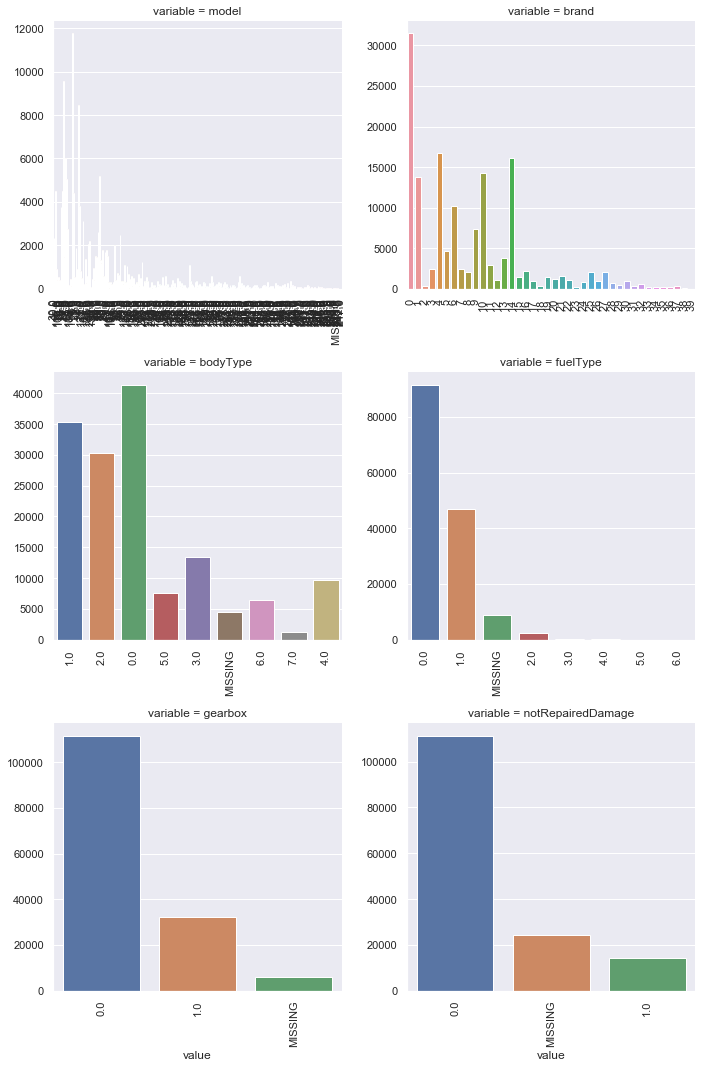

In [52]:
## 5) 类别特征的每个类别频数可视化(count_plot)
def count_plot(x, **kwargs):
    sns.countplot(x=x)
    x=plt.xticks(rotation=90)
    
f = pd.melt(train_data, value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable", col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(count_plot, "value")